In [1]:
import os
import sdds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('/home/ulf/Programming/teufel')

In [3]:
!ls

build			   fel-modulation_stop.h5  slurm.teufel.sh
clean_tests		   lib			   src
CMakeLists.txt		   LICENSE		   tests
doc			   matching.sdds	   teufel_bunch_start.sdds
examples		   rad_push_log.sdds	   ToDo
fel-modulation_beam.sdds   README.md		   undulator_traj.hdf5
fel-modulation_final.h5    run_tests		   warnings.dox
fel-modulation_initial.h5  scripts
fel-modulation_start.h5    setup.dox


In [4]:
data = sdds.SDDS(0)
data.load('rad_push_log.sdds')

In [23]:
data = sdds.SDDS(0)
data.load('matching.sdds')

In [17]:
data = sdds.SDDS(0)
data.load('fel1d-modulation_beam.sdds')

In [24]:
data.listParameters()

     NumberTimeSteps                  401         [] 
     NumberParticles                 4000         [] 
         TotalCharge -9.999999999999939e-10        [C] 


In [25]:
data.listColumns()

                   t        [s] time
                x_av        [m] average position
                y_av        [m] average position
                z_av        [m] average position
              bgx_av         [] average momentum
              bgy_av         [] average momentum
              bgz_av         [] average momentum
               gamma         [] average beam energy
               delta         [] relative momentum spread
               x_rms        [m] r.m.s. position
               y_rms        [m] r.m.s. position
               z_rms        [m] r.m.s. position
                  BF         [] bunching factor


In [26]:
x = np.array(data.getColumnData("x_av"))
print(f'{len(x)} data points')
y = np.array(data.getColumnData("y_av"))
z = np.array(data.getColumnData("z_av"))
if ("t" in data.columnName):
    t = np.array(data.getColumnData("t"))*1e9
    print(f'time span in file {t[0]} ... {t[-1]} ns')
bgx = np.array(data.getColumnData("bgx_av"))
bgy = np.array(data.getColumnData("bgy_av"))
bgz = np.array(data.getColumnData("bgz_av"))

if ("gamma" in data.columnName):
    gamma = np.array(data.getColumnData("gamma"))
else:
    gamma = np.zeros_like(x);
if ("delta" in data.columnName):
    delta = np.array(data.getColumnData("delta"))
else:
    delta = np.zeros_like(x);
if ("BF" in data.columnName):
    bf = np.array(data.getColumnData("BF"))
else:
    bf = np.zeros_like(x);

x_rms = np.array(data.getColumnData("x_rms"))
y_rms = np.array(data.getColumnData("y_rms"))
z_rms = np.array(data.getColumnData("z_rms"))

401 data points
time span in file 0.0 ... 6.671281903961922 ns


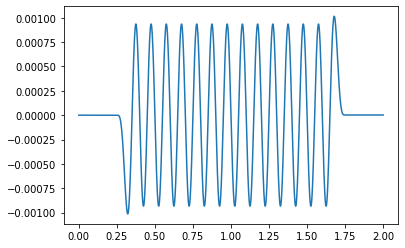

In [21]:
plt.plot(z,x)

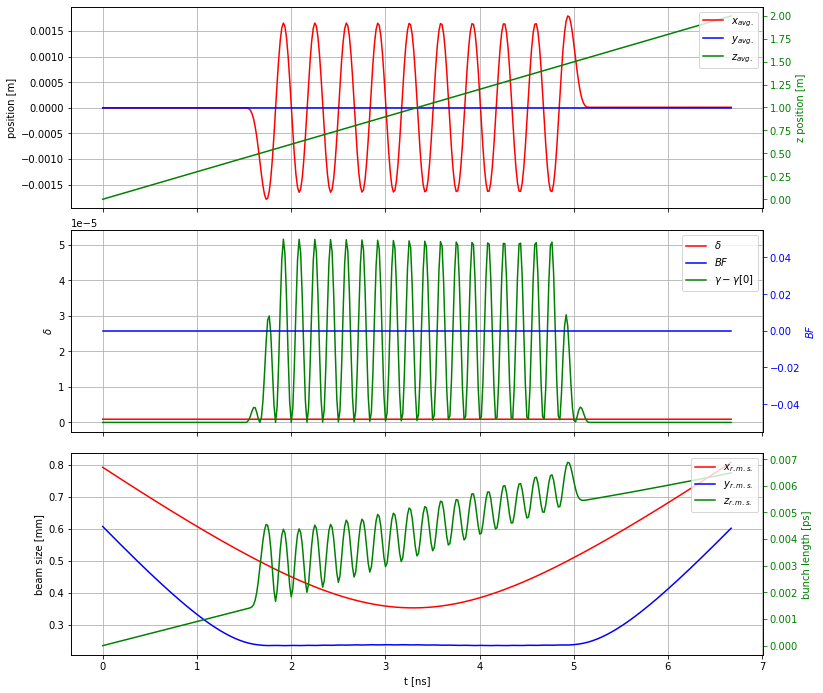

In [27]:
left, width = 0.10, 0.80
rect1 = [left, 0.68, width, 0.28]  #left, bottom, width, height
rect2 = [left, 0.37, width, 0.28]
rect3 = [left, 0.06, width, 0.28]

fig1 = plt.figure(1,figsize=(12,10))
ax1 = fig1.add_axes(rect1)
ax2 = ax1.twinx()	# separate axis for z
ax4 = fig1.add_axes(rect2, sharex=ax1)
ax5 = ax4.twinx()	# separate axis for z
ax21 = fig1.add_axes(rect3)
ax22 = ax21.twinx()	# separate axis for z

l1 = ax1.plot(t, x, "r-", label=r'$x_{avg.}$')
l2 = ax1.plot(t, y, "b-", label=r'$y_{avg.}$')
l3 = ax2.plot(t, z, "g-", label=r'$z_{avg.}$')

ax1.set_ylabel(r'position [m]')
ax1.ticklabel_format(useOffset=False)
for label in ax1.get_xticklabels():
	label.set_visible(False)
ax2.set_ylabel(r'z position [m]', color="g")
ax2.tick_params('y', colors='g')
ax2.ticklabel_format(useOffset=False)
for label in ax2.get_xticklabels():
    label.set_visible(False)
lines = l1 + l2 + l3
labels = [l.get_label() for l in lines]
ax2.legend(lines,labels,loc='upper right')
for label in ax1.get_xticklabels():
    label.set_visible(False)
ax1.grid(True)

# if plot bunching
l4 = ax4.plot(t, delta, "r-", label=r'$\delta$')
l5 = ax5.plot(t, bf, "b-", label=r'$BF$')
l6 = ax4.plot(t, gamma-gamma[0], "g-", label=r'$\gamma - \gamma[0]$')
ax4.set_ylabel(r'$\delta$')
ax4.ticklabel_format(useOffset=False)
for label in ax4.get_xticklabels():
    label.set_visible(False)
ax5.set_ylabel(r'$BF$', color="b")
ax5.tick_params('y', colors='b')
ax5.ticklabel_format(useOffset=False)
for label in ax5.get_xticklabels():
    label.set_visible(False)
lines = l4 + l5 + l6

labels = [l.get_label() for l in lines]
ax5.legend(lines,labels,loc='upper right')
ax4.grid(True)

l21 = ax21.plot(t, 1e3*x_rms, "r-", label=r'$x_{r.m.s.}$')
l22 = ax21.plot(t, 1e3*y_rms, "b-", label=r'$y_{r.m.s.}$')
l23 = ax22.plot(t, 1e12*z_rms/3.0e8, "g-", label=r'$z_{r.m.s.}$')

ax21.set_ylabel(r'beam size [mm]')
ax21.set_xlabel(r't [ns]')
ax21.ticklabel_format(useOffset=False)
ax22.set_ylabel(r'bunch length [ps]', color="g")
ax22.tick_params('y', colors='g')
ax22.ticklabel_format(useOffset=False)
lines = l21 + l22 +l23
labels = [l.get_label() for l in lines]
ax22.legend(lines,labels,loc='upper right')
ax21.grid(True)

plt.show()